In [27]:
#Numpy
import numpy as np
from numpy.random import randn

#Pandas
import pandas as pd

#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Cv2
import cv2

#Seaborn
import seaborn as sns

#Mathematical functions
import math

#Scikit-Image
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage import data, filters, measure, morphology
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import rescale_intensity
from skimage.morphology import reconstruction
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
#Plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [28]:
#Input the path you need.
img = cv2.imread('C:\\Users\\NAHUELH\\Desktop\\IMAGES GIT HUB\\6.tif')

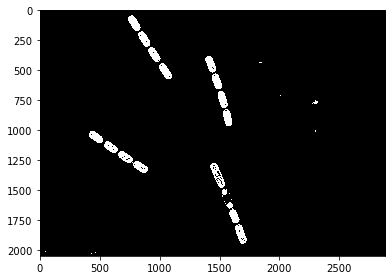

In [29]:
#The rgb2gray function converts RGB images to grayscale.
gray_img = rgb2gray(img)
#We have a grayscale between 0 and 1,black and white, foreground and background.
#You can input any value between 0 and 1.
binarized = gray_img<0.55
#Mathematics morpholy theory
#https://en.wikipedia.org/wiki/Mathematical_morphology
imshow(binarized)

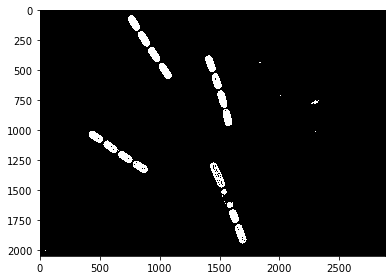

In [30]:
#Create a binary image (of 0s and 1s) with several objects (circles, ellipses, squares, or random shapes).
#Probe an image with a simple shape (a structuring element), and modify this image according to how the shape locally fits or misses the image.
#We can access the elements in the array using square brackets. 
square = np.array([[1,1],
                  [1,1]])
#I generate 2 functions for dilatation and erosion.
def multi_dil(im, num, element=square):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=square):
    for i in range(num):
        im = erosion(im, element)
    return im
#I call at the function each time to open a image and apply erosion,closing and dilation to avoid holes or irrregular shapes.
# 2 mean the neighborhood connectivity. The integer represents the maximum number of orthogonal steps to reach a neighbor. In 2D, it is 1 for a 4-neighborhood and 2 for a 8-neighborhood. Default value is 1.
multi_dilated = multi_dil(binarized, 2)
#Dilatation to close the pixels.
area_closed = area_closing(multi_dilated, 2)
#Closing to fill the holes inside.
multi_eroded = multi_ero(area_closed,2)
#Erosion to restore the original shape of the objects.
opened = opening(multi_eroded)
#Opening to remove the noise on the image.
imshow(opened)

C:\Users\NAHUELH\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


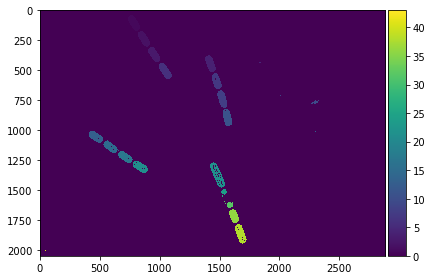

In [31]:
#The first function is label which labels the regions of the input image depending on the connectivity of the pixels to each other. 
#As long as neighboring pixels share the same value, they will be labeled as a single region. 
#This function will return a labeled array where all connected regions are assigned the same integer value.
#I generate a label for each element.
label_im = label(opened)
#label_im = label(binarized)
#I convert each label in a region with properties of element.
regions = regionprops(label_im)
imshow(label_im)

In [32]:
#Save the labels and I generate a region to get properties.
label_img = label(label_im)
regions = regionprops(label_img)

<function matplotlib.pyplot.show(close=None, block=None)>

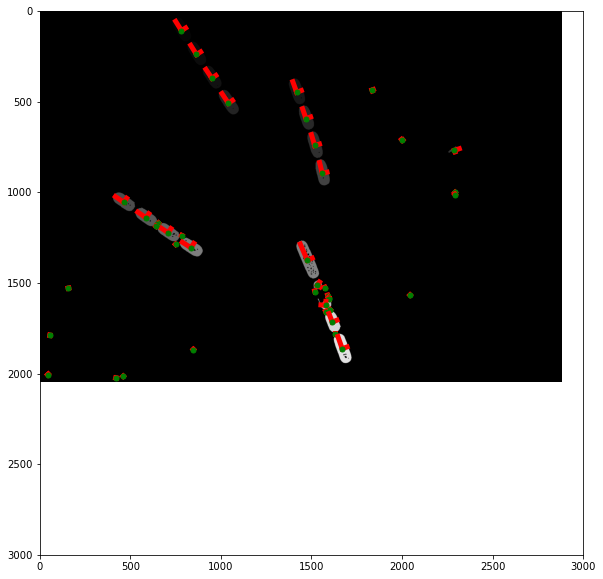

In [33]:
#It can change the size of my plot.
fig, ax = plt.subplots(figsize=(10,10))
#It show the plot with the detection and plot of the axis.
ax.imshow(label_im, cmap=plt.cm.gray)

#It loop evaluate all the properties in all the regions saved in the label.
#With a center point(centroid) in green, it have a orientation(angle) and the coordenates of the axis. I use the elipsis shape, in README of the repository you have a theory explication on elipsis.
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.4 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.4 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.4 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.4 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=5)

    ax.plot(x0, y0, '.g', markersize=10)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=0)

ax.axis((0, 3000, 3000, 0))
plt.show

In [34]:
#Generate a Dataframe with all the properties I want to have in my DataFrame.
props = regionprops_table(label_img, properties=('area','centroid',
                                             'orientation',
                                             'major_axis_length',
                                             'minor_axis_length'))

#I save the Dataframe in this variable.
df = pd.DataFrame(props) 

print("Given Dataframe :\n", df) 
#I can filter the Dataframe for a measure and value.
df2 = df[df['minor_axis_length'] > 40] 
#I print this new DastaFrame.
print('\nResult dataframe :\n', rslt_df) 
#The amount of cells.
df2.count() 
print(df2.count()) 

Given Dataframe :
      area   centroid-0   centroid-1  orientation  major_axis_length  \
0    8053   106.884018   782.202657     0.558965         150.204885   
1    7909   238.744848   865.230370     0.559407         149.128691   
2    7645   369.511184   949.820013     0.589645         146.234808   
3    8266   447.266030  1418.149528     0.348137         154.839777   
4     226   435.146018  1833.871681    -1.200039          20.184182   
5    8346   507.461419  1041.437934     0.591507         159.260625   
6    7553   592.412948  1469.466172     0.332557         143.569083   
7    8341   741.079487  1517.635415     0.293055         156.739536   
8     133   712.639098  2001.180451     0.708660          17.156390   
9    1042   768.053743  2289.105566    -1.241396          70.308176   
10   8124   894.716273  1558.773018     0.231439         152.617442   
11      8  1000.500000  2291.500000    -0.785398           4.242641   
12   7500  1054.900400   463.604667     0.961745         1

In [21]:
#It download the dataframe at any path you want in Excel format.
df.to_excel('W:\\LAB\\Nahuel Ramos\\Size reduction data\\DATA TABLES\\BATCH EXCEL\\6.xlsx', index = False)